# PART A

Assemble a dataframe with one row per customer and the following columns:
    * customer_id
    * gender
    * most_recent_order_date
    * order_count (number of orders placed by this customer)

In [1]:
#data preprocessing
# modules we'll use
import pandas as pd
import numpy as np
import os
import datetime

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display
# set seed for reproducibility
np.random.seed(42) 
IMAGES_PATH=os.path.join(os.getcwd(),"static/")
if not os.path.exists(IMAGES_PATH):
        os.makedirs(IMAGES_PATH)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)



In [2]:
data_file=os.path.join(os.getcwd(),"Klaviyo DS Screen 2.csv")
dataframe_all = pd.read_csv(data_file, sep=",")

In [3]:
# Preview data.
display(dataframe_all.head())

,customer_id,gender,date,value
0,1000,0,1/1/17 0:11,198.5
1,1001,0,1/1/17 0:29,338.0
2,1002,1,1/1/17 1:30,733.0
3,1003,1,1/1/17 1:34,772.0
4,1004,0,1/1/17 3:11,508.0


In [4]:
dataframe_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 4 columns):
customer_id    13471 non-null int64
gender         13471 non-null int64
date           13471 non-null object
value          13471 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 421.0+ KB


In [5]:
num_rows = dataframe_all.shape[0]
# Calculate number of features.
n_features = dataframe_all.shape[1] 

# Print the results
print "Total number of cases: {}".format(num_rows)
print "Number of features: {}".format(n_features)

columns = dataframe_all.columns
print(columns)

Total number of cases: 13471
Number of features: 4
Index([u'customer_id', u'gender', u'date', u'value'], dtype='object')


In [6]:
dataframe_all.describe()

,customer_id,gender,value
count,13471.000000,13471.000000,13471.000000
mean,5033.693564,0.498256,357.322179
std,2500.179222,0.500016,387.210821
min,1000.000000,0.000000,0.000000
25%,2890.500000,0.000000,161.200000
50%,4850.000000,0.000000,258.000000
75%,7157.000000,1.000000,426.000000
max,9813.000000,1.000000,8046.300000


In [7]:
# Check how even the distribution is
dataframe_all["gender"].value_counts()

0    6759
1    6712
Name: gender, dtype: int64

In [8]:
# check the data type of our date column
dataframe_all['date'].dtype

dtype('O')

In [9]:
# create a new column, date_parsed, with the parsed dates
dataframe_all['date_parsed'] = pd.to_datetime(dataframe_all['date'], format = "%m/%d/%y %H:%M")

In [10]:
dataframe_final=dataframe_all.copy()

In [11]:
# print the first few rows
display(dataframe_all['date_parsed'].head())

0   2017-01-01 00:11:00
1   2017-01-01 00:29:00
2   2017-01-01 01:30:00
3   2017-01-01 01:34:00
4   2017-01-01 03:11:00
Name: date_parsed, dtype: datetime64[ns]

('Saving figure', 'attribute_histogram_plots')


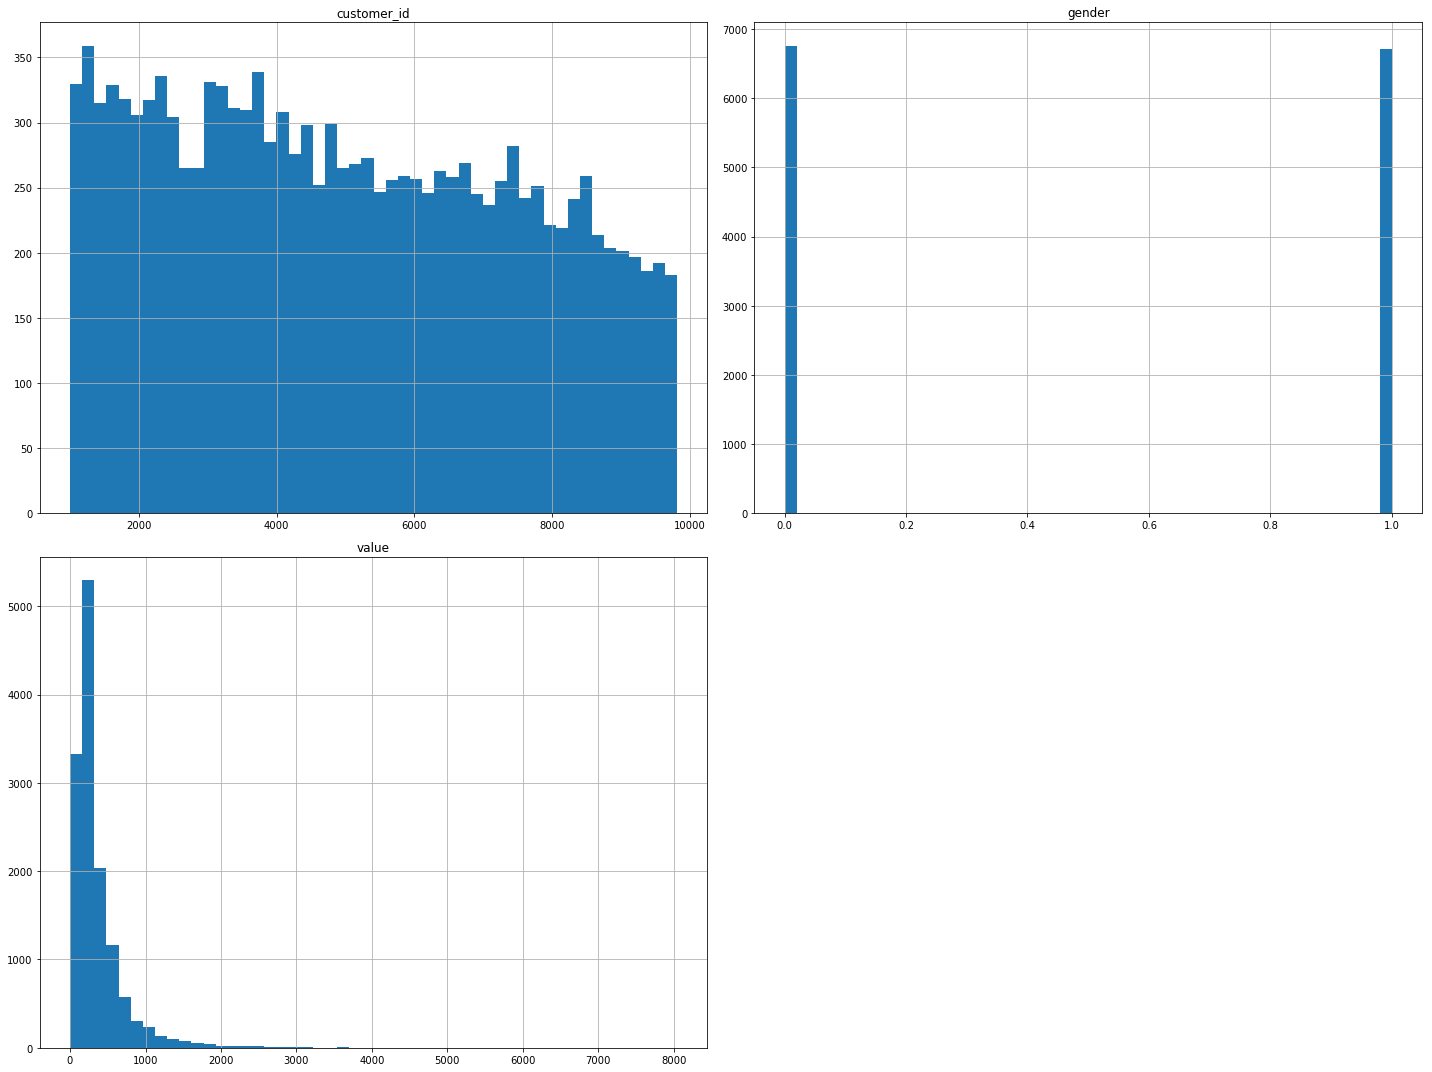

In [12]:
dataframe_all.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

In [13]:
counter_nan = dataframe_all.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]

In [14]:
# No missing data
print counter_nan

customer_id    0
gender         0
date           0
value          0
date_parsed    0
dtype: int64


In [15]:
corr_matrix = dataframe_all.corr()
corr_matrix["gender"].sort_values(ascending=False)

gender         1.000000
customer_id    0.000423
value         -0.017022
Name: gender, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb270f24ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb270f0b190>]], dtype=object)

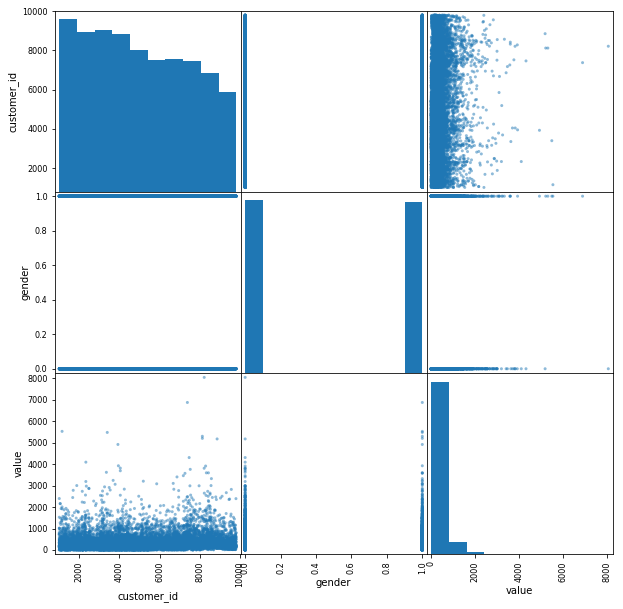

In [16]:
# Visualising distribution of data
from pandas.plotting import scatter_matrix

scatter_matrix(dataframe_all, figsize=(10,10))
#save_fig("discrete_feature_corelations")

In [17]:
# Let's modify this
dataframe_final.head()

,customer_id,gender,date,value,date_parsed
0,1000,0,1/1/17 0:11,198.5,2017-01-01 00:11:00
1,1001,0,1/1/17 0:29,338.0,2017-01-01 00:29:00
2,1002,1,1/1/17 1:30,733.0,2017-01-01 01:30:00
3,1003,1,1/1/17 1:34,772.0,2017-01-01 01:34:00
4,1004,0,1/1/17 3:11,508.0,2017-01-01 03:11:00


In [18]:
# check values for comparison of steps
dataframe_final[dataframe_final['customer_id']==1002]

,customer_id,gender,date,value,date_parsed
2,1002,1,1/1/17 1:30,733.0,2017-01-01 01:30:00
928,1002,1,1/23/17 4:33,148.6,2017-01-23 04:33:00
1742,1002,1,2/19/17 21:35,176.0,2017-02-19 21:35:00


In [19]:
dataframe_final['most_recent_order_date']= dataframe_final.groupby('customer_id')['date_parsed'].transform('max')
dataframe_final=dataframe_final.drop(dataframe_final.columns[[2, 3, 4]], axis=1)
dataframe_final['order_count'] = dataframe_final.groupby('customer_id')['customer_id'].transform('count')

In [20]:
# This will have duplicates
dataframe_final[dataframe_final['customer_id']==1002]

,customer_id,gender,most_recent_order_date,order_count
2,1002,1,2017-02-19 21:35:00,3
928,1002,1,2017-02-19 21:35:00,3
1742,1002,1,2017-02-19 21:35:00,3


In [21]:
dataframe_final=dataframe_final.drop_duplicates(subset='customer_id', keep="first")

In [22]:
# Removed duplicates
dataframe_final[dataframe_final['customer_id']==1002]

,customer_id,gender,most_recent_order_date,order_count
2,1002,1,2017-02-19 21:35:00,3


In [23]:
# This is the final dataframe as specified
dataframe_final

,customer_id,gender,most_recent_order_date,order_count
0,1000,0,2017-01-01 00:11:00,1
1,1001,0,2017-01-01 00:29:00,1
2,1002,1,2017-02-19 21:35:00,3
3,1003,1,2017-04-26 02:37:00,4
4,1004,0,2017-01-01 03:11:00,1
5,1005,1,2017-12-16 01:39:00,2
6,1006,1,2017-05-09 15:27:00,3
7,1007,0,2017-01-01 15:59:00,1
8,1008,0,2017-12-17 05:47:00,3
9,1009,1,2017-01-01 19:27:00,1


# PART B

Plot the count of orders per week.

In [24]:
# Since the whole data is only of year 2017
dataframe_all['Week'] = dataframe_all['date_parsed'].apply(lambda x: "%02d" % (x.week))

In [25]:
dataframe_all[:15]

,customer_id,gender,date,value,date_parsed,Week
0,1000,0,1/1/17 0:11,198.50,2017-01-01 00:11:00,52
1,1001,0,1/1/17 0:29,338.00,2017-01-01 00:29:00,52
2,1002,1,1/1/17 1:30,733.00,2017-01-01 01:30:00,52
3,1003,1,1/1/17 1:34,772.00,2017-01-01 01:34:00,52
4,1004,0,1/1/17 3:11,508.00,2017-01-01 03:11:00,52
5,1005,1,1/1/17 10:08,338.00,2017-01-01 10:08:00,52
6,1006,1,1/1/17 15:42,1526.43,2017-01-01 15:42:00,52
7,1007,0,1/1/17 15:59,168.00,2017-01-01 15:59:00,52
8,1008,0,1/1/17 18:01,207.99,2017-01-01 18:01:00,52
9,1009,1,1/1/17 19:27,283.00,2017-01-01 19:27:00,52


In [26]:
dataframe_all.groupby('Week').value.count().sum()

13471

In [27]:
weekly_counts=dataframe_all.groupby('Week').value.count()

In [28]:
weekly_counts

Week
01    180
02    264
03    405
04    233
05    211
06    195
07    248
08    315
09    260
10    318
11    269
12    240
13    237
14    350
15    284
16    220
17    223
18    257
19    337
20    627
21    301
22    215
23    219
24    310
25    276
26    380
27    286
28    226
29    244
30    188
31    183
32    192
33    178
34    302
35    200
36    218
37    237
38    172
39    201
40    347
41    345
42    182
43    154
44    159
45    170
46    183
47    391
48    343
49    236
50    294
51    208
52    258
Name: value, dtype: int64

('Saving figure', ' Orders per week plots')


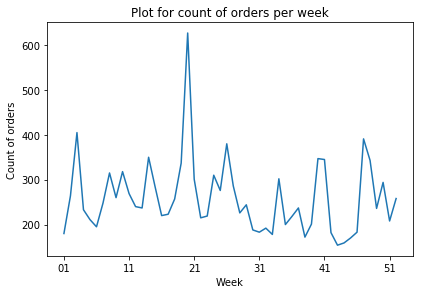

In [29]:
dataframe_all.set_index('Week', inplace=True)
plt.ylabel("Count of orders")
plt.title("Plot for count of orders per week")
save_fig(" Orders per week plots")
weekly_counts.plot()

# PART C

Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

In [30]:
dataframe_all.groupby('gender').value.mean()

gender
0    363.890006
1    350.708361
Name: value, dtype: float64

In [31]:
dataframe_all.groupby('gender').value.count()

gender
0    6759
1    6712
Name: value, dtype: int64

In [32]:
dataframe_all.groupby('gender').value.value_counts()

gender  value  
0       10.00      369
        268.00     112
        10.89      100
        208.00      95
        258.00      93
        168.00      76
        198.00      62
        278.00      58
        178.00      54
        168.40      41
        288.00      38
        248.00      37
        280.90      32
        291.79      31
        298.00      31
        308.00      30
        0.00        29
        100.00      29
        108.00      29
        138.00      29
        164.80      28
        188.20      27
        226.46      27
        98.00       26
        188.00      26
        176.80      25
        233.20      25
        84.00       24
        158.50      24
        250.00      24
                  ... 
1       2351.20      1
        2356.07      1
        2375.60      1
        2397.43      1
        2420.00      1
        2485.44      1
        2505.50      1
        2558.00      1
        2592.00      1
        2610.00      1
        2733.40      1
        2733.92   

Since we are concerned with 13471 values a difference of 13 can be considered relatively significant since samples for both genders were evenly distributed in the data. A comparison can be made and perhaps one gender has more expenditure than the other or more number of orders while the other has fewer orders but of higher value. There could be an interesting pattern here